In [1]:
import pywt
import pywt.data
from scipy import stats

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
train_pca_list = []
test_pca_list = []
filenames = ['brushteeth_', 'cook_', 'drink_', 'getintobed_', 'nothing_', 'sitdown_chair_', 'sitdown_sofa_', 'sleeping_', 
             'standup_chair_', 'standup_sofa_', 'walk_', 'washingdishes_']

for ind, file in enumerate(filenames):
    temp_train = []
    temp_test = []
    for i in range(25):
        df = pd.read_csv(fr'csipca_data_amplitude/{file} ({i+1}).csv')
        df.drop(columns=["Unnamed: 0"])
        temp_train.append(df)
    for i in range(25, 30):
        df = pd.read_csv(fr'csipca_data_amplitude/{file} ({i+1}).csv')
        df.drop(columns=["Unnamed: 0"])
        temp_test.append(df)
    train_pca_list.append(temp_train)
    test_pca_list.append(temp_test)
    

In [3]:
max_file_len = 0
for activity in train_pca_list:
    for file in activity:
        if len(file) > max_file_len: 
            max_file_len = len(file)

print(max_file_len)

480


(199, 355)


<AxesSubplot:>

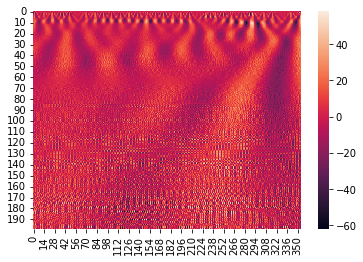

In [4]:
file = pd.read_csv('csipca_data_amplitude/nothing_ (1).csv')
nothing, freqs = pywt.cwt(file['0'], np.arange(1,200), wavelet='morl')
print(nothing.shape)
for i in range(1, 16):
    coef, freqs = pywt.cwt(file[str(i)], np.arange(1,200), wavelet='morl')
    nothing += coef

sns.heatmap(nothing)

In [5]:
def transform_matrix(matrix):
    arr = []
    for row in matrix:
        arr += list(row)
    return arr
def flatten(t):
    return [item for sublist in t for item in sublist]

In [6]:
from numpy import newaxis
train_vectors_activities = []
for activity in train_pca_list:
    vectors_one_activity = []
    for file in activity:
        # file reshaping 
        coef, freqs = pywt.cwt(file['0'], np.arange(1, 200), wavelet='morl')
        matrix = coef
        for col in map(str, range(1, 16)):                                 
            coef, freqs = pywt.cwt(file[col], np.arange(1, 200), wavelet='morl')
            matrix += coef
            
        # now matrix is just a sum of all coefs
        to_add = max_file_len - matrix.shape[1]
        
        matrix = np.concatenate((matrix, nothing[:,0:to_add]), axis=1)
        #print(len(matrix), len(matrix[0]))
        #print(matrix.shape)
        vector = matrix.flatten()
        vectors_one_activity.append(vector)
        #vectors_one_activity = vector[:, newaxis]
        #print(vectors_one_activity)
    #print(len(vectors_one_activity))
    #print(len(vectors_one_activity[0]))
    train_vectors_activities.append(vectors_one_activity)
    print('activity done')

activity done
activity done
activity done
activity done
activity done
activity done
activity done
activity done
activity done
activity done
activity done
activity done


In [7]:
test_vectors_activities = []
for activity in test_pca_list:
    vectors_one_activity = []
    for file in activity:
        # file reshaping 
        
        coef, freqs = pywt.cwt(file['0'], np.arange(1, 200), wavelet='morl')
        matrix = coef
        for col in map(str, range(1, 16)):                                 
            coef, freqs = pywt.cwt(file[col], np.arange(1, 200), wavelet='morl')
            matrix += coef
            
        # now matrix is just a sum of all coefs
        to_add = max_file_len - matrix.shape[1]
        matrix = np.concatenate((matrix, nothing[:,0:to_add]), axis=1) 
        vector = matrix.flatten()
        vectors_one_activity.append(vector)
    
    test_vectors_activities.append(vectors_one_activity)
    print('activity done')

activity done
activity done
activity done
activity done
activity done
activity done
activity done
activity done
activity done
activity done
activity done
activity done


In [8]:
train_vectors_df = pd.DataFrame()
for ind, activity in enumerate(train_vectors_activities):
    activity_df = pd.DataFrame(activity)
    activity_df['label'] = filenames[ind]
    train_vectors_df = pd.concat([train_vectors_df, activity_df])
    

train_vectors_df = train_vectors_df.reset_index().drop(["index"], axis=1)
train_vectors_df = train_vectors_df.replace(np.nan, train_vectors_df.mean().mean())

C:\Users\Igor\AppData\Local\Temp/ipykernel_16296/4242691456.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_vectors_df = train_vectors_df.replace(np.nan, train_vectors_df.mean().mean())


In [9]:
train_vectors_df

,0,1,2,3,4,5,6,7,8,9,...,95511,95512,95513,95514,95515,95516,95517,95518,95519,label
0,0.017820,0.717546,5.653092,-5.191692,-3.531390,6.858244,-4.698112,4.631103,-2.061441,-6.815195,...,1.066722,-11.879189,-13.624274,4.872271,-9.318393,-3.903251,-16.620292,8.025194,-12.365278,brushteeth_
1,-0.063300,0.435374,0.498082,-0.090676,-0.328770,0.822971,-0.104859,0.344345,5.546436,-4.531031,...,4.872271,-9.318393,-3.903251,-16.620292,8.025194,-12.365278,-18.032573,26.781553,-12.050787,brushteeth_
2,-3.835264,0.609673,-0.342352,0.771374,0.656881,-0.128966,-0.792215,-0.174214,1.204391,-0.775826,...,-21.257322,-21.257322,-21.257322,-21.257322,-21.257322,-21.257322,-21.257322,-21.257322,-21.257322,brushteeth_
3,-2.495983,-0.186778,1.094991,0.271721,-1.555495,1.235393,-1.237692,1.358206,0.157417,-1.281001,...,-21.257322,-21.257322,-21.257322,-21.257322,-21.257322,-21.257322,-21.257322,-21.257322,-21.257322,brushteeth_
4,1.083314,4.798539,-6.583057,-4.275485,6.250552,-0.677139,-0.230390,1.215800,-0.425517,0.235717,...,5.372730,7.964568,-13.495513,9.953352,0.932654,-7.884995,3.308646,-8.092264,4.486566,brushteeth_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-51.497830,82.600858,5.832275,-8.926601,1.229688,2.041385,3.607516,-2.811816,-5.351365,-4.369299,...,-21.257322,-21.257322,-21.257322,-21.257322,-21.257322,-21.257322,-21.257322,-21.257322,-21.257322,washingdishes_
296,-0.559738,77.208984,1.889043,0.366503,-0.355689,0.027578,1.493976,4.537996,47.856858,-55.911785,...,-34.549262,-1.603504,9.991744,-18.896328,1.066722,-11.879189,-13.624274,4.872271,-9.318393,washingdishes_
297,6.608833,76.392912,-6.361770,-2.998979,0.054313,14.204024,49.841818,-56.968805,-51.714230,43.137294,...,-12.365278,-18.032573,26.781553,-12.050787,-33.014575,28.035562,-8.140666,-36.948253,25.916135,washingdishes_
298,4.483627,79.582847,-2.627689,-3.034275,3.618861,57.797231,-53.338781,-62.319583,61.346150,4.120127,...,-1.603504,9.991744,-18.896328,1.066722,-11.879189,-13.624274,4.872271,-9.318393,-3.903251,washingdishes_


In [10]:
import logging
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
labels = train_vectors_df['label']
train_vectors_df = train_vectors_df.drop(columns=['label'])
le = preprocessing.LabelEncoder()
le.fit(labels)
labels = le.transform(labels)

In [11]:
print(le.classes_)
print(list(le.classes_))

['brushteeth_' 'cook_' 'drink_' 'getintobed_' 'nothing_' 'sitdown_chair_'
 'sitdown_sofa_' 'sleeping_' 'standup_chair_' 'standup_sofa_' 'walk_'
 'washingdishes_']
['brushteeth_', 'cook_', 'drink_', 'getintobed_', 'nothing_', 'sitdown_chair_', 'sitdown_sofa_', 'sleeping_', 'standup_chair_', 'standup_sofa_', 'walk_', 'washingdishes_']


In [12]:
train_vectors_df['label'] = labels
train_vectors_df.shape

(300, 95521)

In [13]:
train_data, test_data = train_test_split(train_vectors_df, test_size=0.3)
train_feature = train_data.drop(columns=['label'])
train_target = train_data['label']

test_feature = test_data.drop(columns=['label'])
test_target = test_data['label']

In [14]:
model = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': True, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [15]:
param_grid = { "criterion" : ["gini", "entropy"], 
               "min_samples_leaf" : [1, 5, 10], 
               "min_samples_split" : [2, 4, 10, 12], 
               "n_estimators": [50, 100, 400, 700]}
gs = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=10)
gs = gs.fit(train_feature, train_target)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV 1/3; 1/96] START criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/3; 1/96] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.171 total time=   4.5s
[CV 2/3; 1/96] START criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 1/96] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.243 total time=   2.6s
[CV 3/3; 1/96] START criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/3; 1/96] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.271 total time=   2.8s
[CV 1/3; 2/96] START criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/3; 2/96] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.157 total time=   4.4s
[CV 2/3; 2/96] START criterion=gini, min_samples_leaf=1, min

[CV 2/3; 13/96] END criterion=gini, min_samples_leaf=1, min_samples_split=12, n_estimators=50;, score=0.214 total time=   2.7s
[CV 3/3; 13/96] START criterion=gini, min_samples_leaf=1, min_samples_split=12, n_estimators=50
[CV 3/3; 13/96] END criterion=gini, min_samples_leaf=1, min_samples_split=12, n_estimators=50;, score=0.257 total time=   2.6s
[CV 1/3; 14/96] START criterion=gini, min_samples_leaf=1, min_samples_split=12, n_estimators=100
[CV 1/3; 14/96] END criterion=gini, min_samples_leaf=1, min_samples_split=12, n_estimators=100;, score=0.200 total time=   4.3s
[CV 2/3; 14/96] START criterion=gini, min_samples_leaf=1, min_samples_split=12, n_estimators=100
[CV 2/3; 14/96] END criterion=gini, min_samples_leaf=1, min_samples_split=12, n_estimators=100;, score=0.286 total time=   4.3s
[CV 3/3; 14/96] START criterion=gini, min_samples_leaf=1, min_samples_split=12, n_estimators=100
[CV 3/3; 14/96] END criterion=gini, min_samples_leaf=1, min_samples_split=12, n_estimators=100;, score=

[CV 3/3; 25/96] END criterion=gini, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.229 total time=   2.7s
[CV 1/3; 26/96] START criterion=gini, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 1/3; 26/96] END criterion=gini, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.143 total time=   4.6s
[CV 2/3; 26/96] START criterion=gini, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 2/3; 26/96] END criterion=gini, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.243 total time=   4.5s
[CV 3/3; 26/96] START criterion=gini, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 3/3; 26/96] END criterion=gini, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.257 total time=   4.4s
[CV 1/3; 27/96] START criterion=gini, min_samples_leaf=5, min_samples_split=10, n_estimators=400
[CV 1/3; 27/96] END criterion=gini, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, scor

[CV 1/3; 38/96] END criterion=gini, min_samples_leaf=10, min_samples_split=4, n_estimators=100;, score=0.186 total time=   4.1s
[CV 2/3; 38/96] START criterion=gini, min_samples_leaf=10, min_samples_split=4, n_estimators=100
[CV 2/3; 38/96] END criterion=gini, min_samples_leaf=10, min_samples_split=4, n_estimators=100;, score=0.300 total time=   4.2s
[CV 3/3; 38/96] START criterion=gini, min_samples_leaf=10, min_samples_split=4, n_estimators=100
[CV 3/3; 38/96] END criterion=gini, min_samples_leaf=10, min_samples_split=4, n_estimators=100;, score=0.257 total time=   4.3s
[CV 1/3; 39/96] START criterion=gini, min_samples_leaf=10, min_samples_split=4, n_estimators=400
[CV 1/3; 39/96] END criterion=gini, min_samples_leaf=10, min_samples_split=4, n_estimators=400;, score=0.171 total time=  14.1s
[CV 2/3; 39/96] START criterion=gini, min_samples_leaf=10, min_samples_split=4, n_estimators=400
[CV 2/3; 39/96] END criterion=gini, min_samples_leaf=10, min_samples_split=4, n_estimators=400;, sco

[CV 2/3; 50/96] END criterion=entropy, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.214 total time=   4.6s
[CV 3/3; 50/96] START criterion=entropy, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/3; 50/96] END criterion=entropy, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.143 total time=   4.9s
[CV 1/3; 51/96] START criterion=entropy, min_samples_leaf=1, min_samples_split=2, n_estimators=400
[CV 1/3; 51/96] END criterion=entropy, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.129 total time=  15.2s
[CV 2/3; 51/96] START criterion=entropy, min_samples_leaf=1, min_samples_split=2, n_estimators=400
[CV 2/3; 51/96] END criterion=entropy, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.271 total time=  15.5s
[CV 3/3; 51/96] START criterion=entropy, min_samples_leaf=1, min_samples_split=2, n_estimators=400
[CV 3/3; 51/96] END criterion=entropy, min_samples_leaf=1, min_samples_split=2, n_es

[CV 2/3; 62/96] END criterion=entropy, min_samples_leaf=1, min_samples_split=12, n_estimators=100;, score=0.300 total time=   4.8s
[CV 3/3; 62/96] START criterion=entropy, min_samples_leaf=1, min_samples_split=12, n_estimators=100
[CV 3/3; 62/96] END criterion=entropy, min_samples_leaf=1, min_samples_split=12, n_estimators=100;, score=0.286 total time=   4.8s
[CV 1/3; 63/96] START criterion=entropy, min_samples_leaf=1, min_samples_split=12, n_estimators=400
[CV 1/3; 63/96] END criterion=entropy, min_samples_leaf=1, min_samples_split=12, n_estimators=400;, score=0.129 total time=  15.3s
[CV 2/3; 63/96] START criterion=entropy, min_samples_leaf=1, min_samples_split=12, n_estimators=400
[CV 2/3; 63/96] END criterion=entropy, min_samples_leaf=1, min_samples_split=12, n_estimators=400;, score=0.314 total time=  15.6s
[CV 3/3; 63/96] START criterion=entropy, min_samples_leaf=1, min_samples_split=12, n_estimators=400
[CV 3/3; 63/96] END criterion=entropy, min_samples_leaf=1, min_samples_split

[CV 2/3; 74/96] END criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.271 total time=   5.0s
[CV 3/3; 74/96] START criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 3/3; 74/96] END criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.171 total time=   4.9s
[CV 1/3; 75/96] START criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=400
[CV 1/3; 75/96] END criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=0.200 total time=  16.6s
[CV 2/3; 75/96] START criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=400
[CV 2/3; 75/96] END criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=0.343 total time=  16.7s
[CV 3/3; 75/96] START criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=400
[CV 3/3; 75/96] END criterion=entropy, min_samples_leaf=5, min_samples_split

[CV 2/3; 86/96] END criterion=entropy, min_samples_leaf=10, min_samples_split=4, n_estimators=100;, score=0.300 total time=   4.7s
[CV 3/3; 86/96] START criterion=entropy, min_samples_leaf=10, min_samples_split=4, n_estimators=100
[CV 3/3; 86/96] END criterion=entropy, min_samples_leaf=10, min_samples_split=4, n_estimators=100;, score=0.186 total time=   4.6s
[CV 1/3; 87/96] START criterion=entropy, min_samples_leaf=10, min_samples_split=4, n_estimators=400
[CV 1/3; 87/96] END criterion=entropy, min_samples_leaf=10, min_samples_split=4, n_estimators=400;, score=0.157 total time=  15.2s
[CV 2/3; 87/96] START criterion=entropy, min_samples_leaf=10, min_samples_split=4, n_estimators=400
[CV 2/3; 87/96] END criterion=entropy, min_samples_leaf=10, min_samples_split=4, n_estimators=400;, score=0.286 total time=  15.1s
[CV 3/3; 87/96] START criterion=entropy, min_samples_leaf=10, min_samples_split=4, n_estimators=400
[CV 3/3; 87/96] END criterion=entropy, min_samples_leaf=10, min_samples_spli

In [16]:
print(gs.best_score_)
print(gs.best_params_)
print(gs.cv_results_)

0.2714285714285714
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 700}
{'mean_fit_time': array([ 3.07311225,  4.09875258, 14.36651953, 24.06680894,  2.47122653,
        4.01889674, 13.91728377, 23.60842061,  2.44586158,  3.95034965,
       13.67770537, 23.63177363,  2.43271486,  4.05175511, 13.63454278,
       23.78962994,  2.39515313,  4.07839743, 13.93216292, 24.10951845,
        2.47977638,  3.94458405, 13.97748089, 23.53442955,  2.4141376 ,
        4.22466596, 13.77932715, 24.21437383,  2.46093249,  4.08255474,
       14.004632  , 24.23147043,  2.41335567,  3.94226265, 13.87199068,
       23.2818106 ,  2.3194406 ,  3.96611802, 13.62523373, 22.85905409,
        2.36742838,  3.91860819, 13.45482699, 23.09783785,  2.36450744,
        3.99229534, 13.41639654, 23.6758914 ,  2.5475839 ,  4.4475166 ,
       15.12594692, 26.11323698,  2.54934263,  4.28584194, 15.234056  ,
       26.10795863,  2.52396472,  4.34026019, 14.89523307, 26.05722817,
        

In [17]:
best_model = gs.best_estimator_
best_model.score(test_feature, test_target)

0.16666666666666666

In [18]:
def roc_curve_plot(model_name, fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, linewidth=2, label='Area(AUC) = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title(model_name + ' ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

In [19]:
pred = best_model.predict(test_feature)

In [20]:
print(classification_report(test_target, pred))

              precision    recall  f1-score   support

           0       0.12      0.33      0.18         6
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         7
           4       0.17      0.14      0.15         7
           5       0.44      0.57      0.50         7
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         8
          10       0.50      0.43      0.46         7
          11       0.56      0.62      0.59         8

    accuracy                           0.17        90
   macro avg       0.15      0.18      0.16        90
weighted avg       0.14      0.17      0.15        90



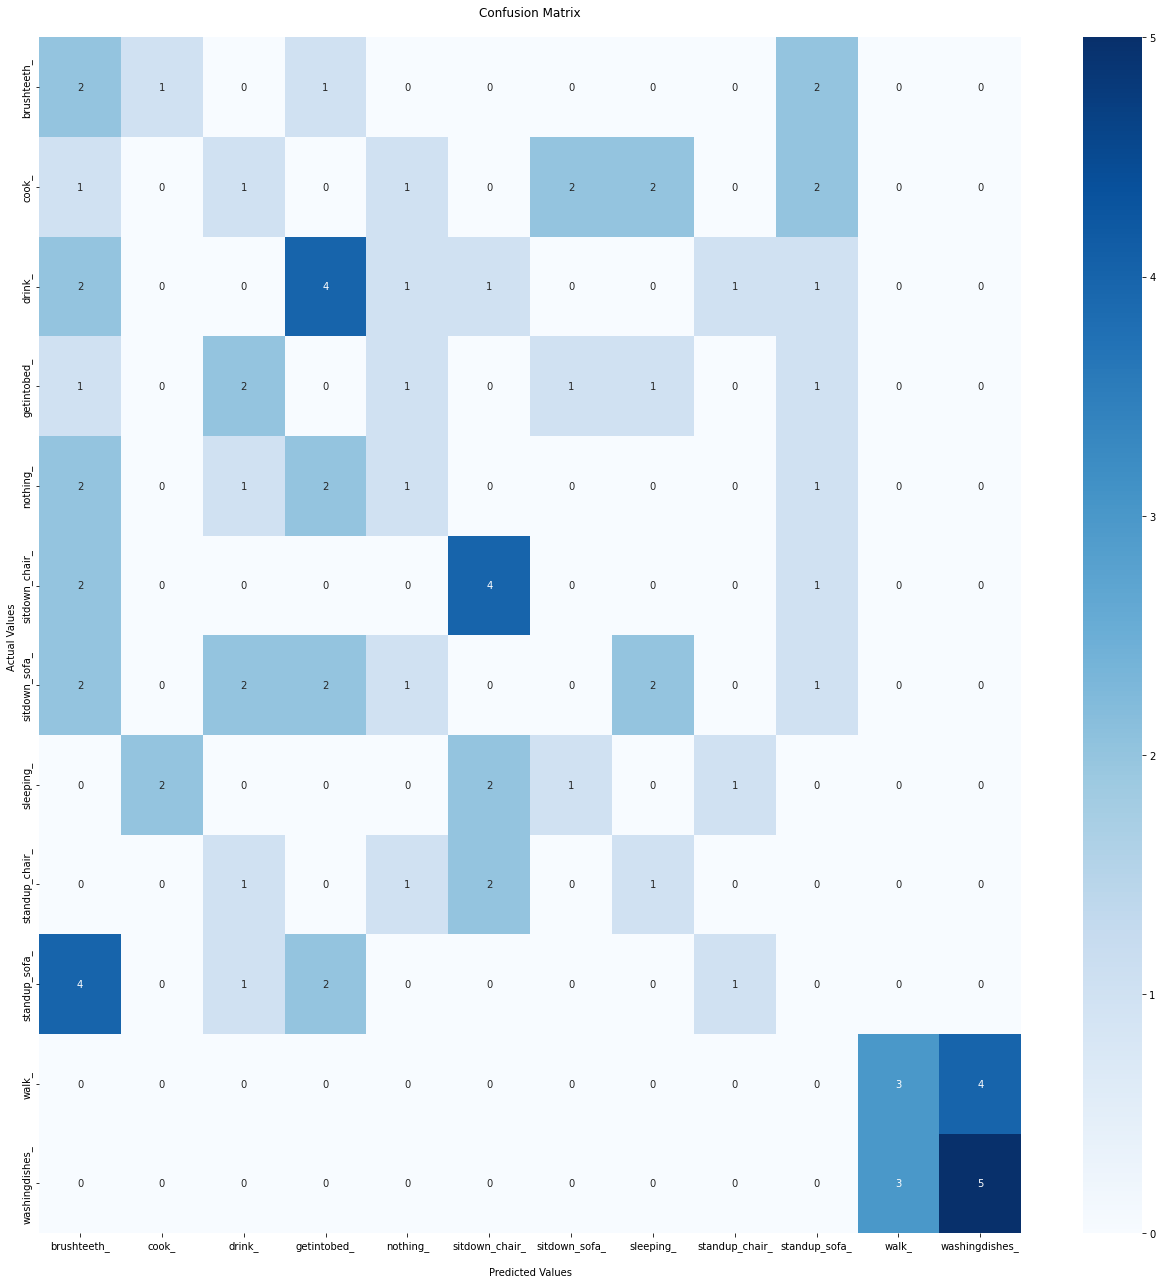

In [21]:
plt.figure(figsize = (22, 22))
cf_matrix = confusion_matrix(test_target, pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(le.classes_)
ax.yaxis.set_ticklabels(le.classes_, rotation=90, va="center")

plt.show()

In [23]:
import _pickle as cPickle

with open('randomForest.pickle', 'wb') as f:
    cPickle.dump(best_model, f)
#with open('randomForest.pickle', 'rb') as f:
#    rf = cPickle.load(f)